## House Price Prediction using Linear Regression
#### This project use linear regression algorithm to predict the potential house price based on the house condition, number of bedrooms, bathrooms, sqft, etc'.
#### By : Kevin Ari
#### Data provided by : Ruang Guru

In [51]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics


In [61]:
df=pd.read_csv('C:/Users/HP/Documents/RuangGuru/Python_training/House Price/kc_house_data.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Investigation (Finding Null Value and remove unnecessary variable)

In [62]:
df=df.drop('id',axis=1)
print('done')

done


In [63]:
df=df.drop('Unnamed: 0',axis=1)
print('done')

done


In [64]:
df=df.drop('date',axis=1)
print('done')

done


In [30]:
def data_inv(df):
    print ('Number of rows : ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dataset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-types each columns: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing row in each columns: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

Number of rows :  21613
dataset variables:  19
----------
dataset columns: 

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
----------
data-types each columns: 

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
----------
missing row in each columns: 

bedrooms     13
bathrooms    10
dtype: int64


#### Its seems theres a null value on bedrooms and bathrooms. So lets replace it using median

In [8]:
df['bedrooms'].describe()

count    21613.000000
mean         3.372646
std          0.926423
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [65]:
df['bathrooms'].fillna(df['bathrooms'].median(),inplace=True)

In [66]:
df['bedrooms'].fillna(df['bedrooms'].median(),inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

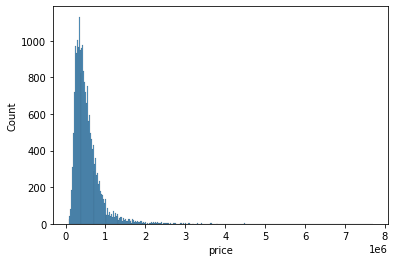

In [33]:
import seaborn as sns
sns.histplot(df.price)

## EDA Section
#### Now lets see the correlation of another variable to 'Price' Variable

In [34]:
df.corr(method='pearson')['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525714
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

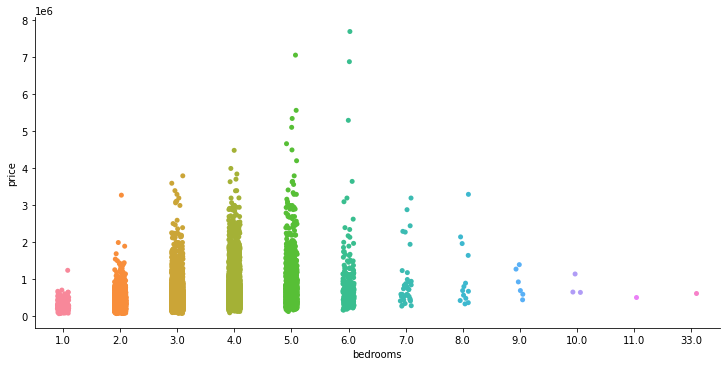

In [35]:
sns.catplot(x='bedrooms', y='price', data=df, height=5, aspect=2)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

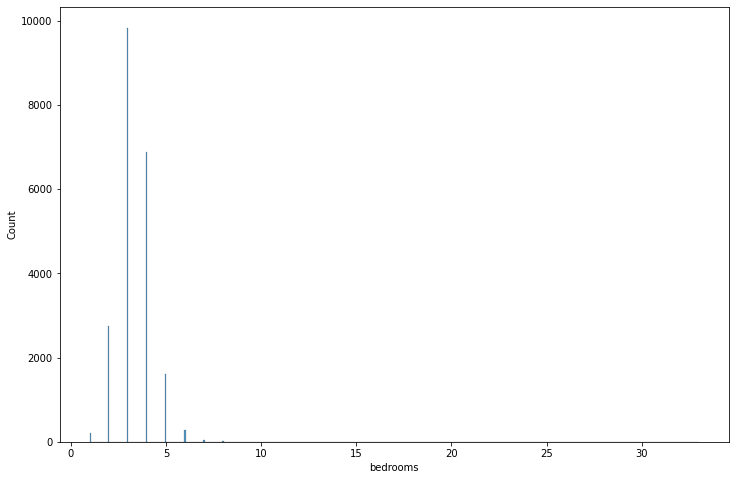

In [36]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df.bedrooms)

### its seems there are some outliers, so let Filter the outliers

## Filtering some outliers

In [67]:
df = df[df.bedrooms <= 7]

Text(0, 0.5, 'Amount')

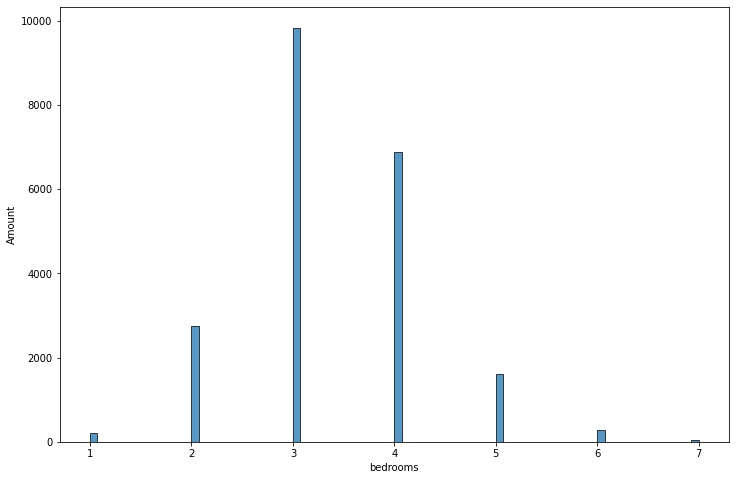

In [38]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df.bedrooms)
plt.ylabel('Amount')

## ok next to bathrooms, lets see if we can filter some outliers

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

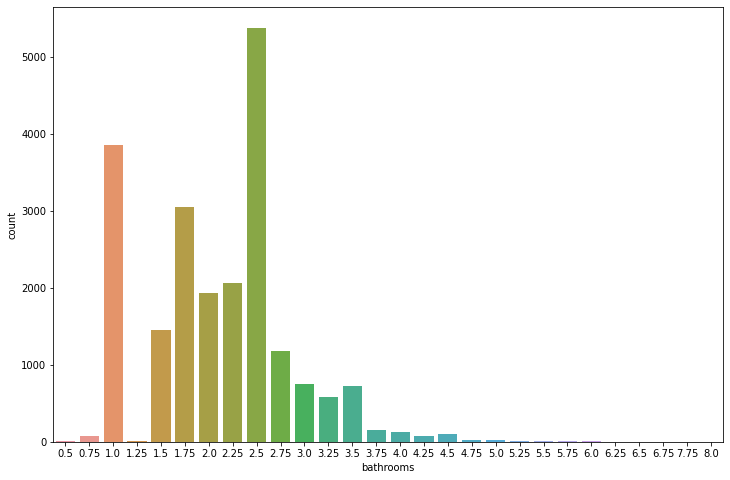

In [40]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(df.bathrooms)

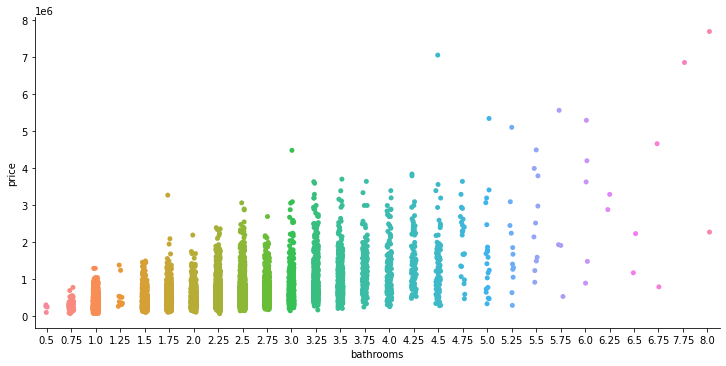

In [41]:
sns.catplot(x='bathrooms', y='price', data=df, height=5, aspect=2)

In [68]:
df=df[df.bathrooms <= 4.75]
df.bathrooms = df.bathrooms.apply(lambda x:1 if(x>=0.5 and x<=1.25)
                                  else x)
df.bathrooms = df.bathrooms.apply(lambda x:4.5 if(x==4.75)
                                  else x)


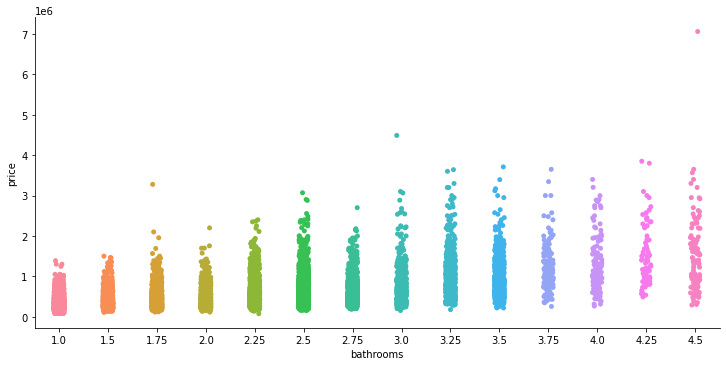

In [49]:
sns.catplot(x='bathrooms', y='price', data=df, height=5, aspect=2)

## Seems already good, but theres a few price outliers (cant delete it, because theres so much factor to affect the price)


## Now movin to Square Footage

In [69]:
sqft_cols = df.columns[df.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [55]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
def show_count_plots(data, cols):
    fig = plt.figure(figsize=(10, 10))
    grid = GridSpec(ncols=3,
                    nrows=3, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(data[name], kde=True, ax=ax)

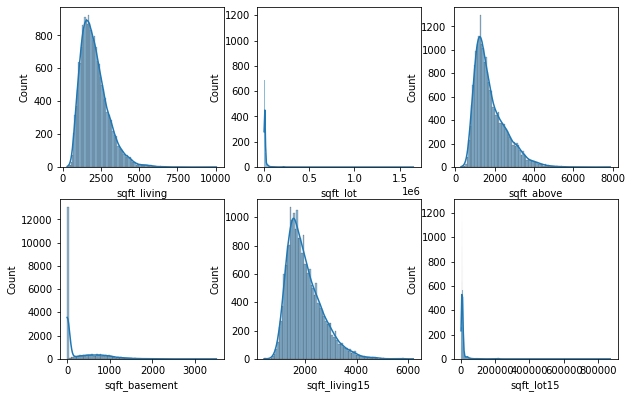

In [57]:
show_count_plots(df, sqft_cols)

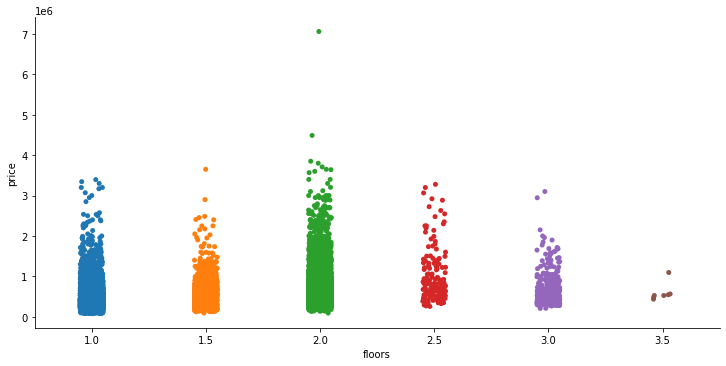

In [70]:
sns.catplot(x='floors', y='price', data=df, height=5, aspect=2) ##checking outliers againnnn


In [75]:
df.floors=df.floors.apply(lambda x:3.5 if(x>=2.5 and x<=3.5)
                   else x)

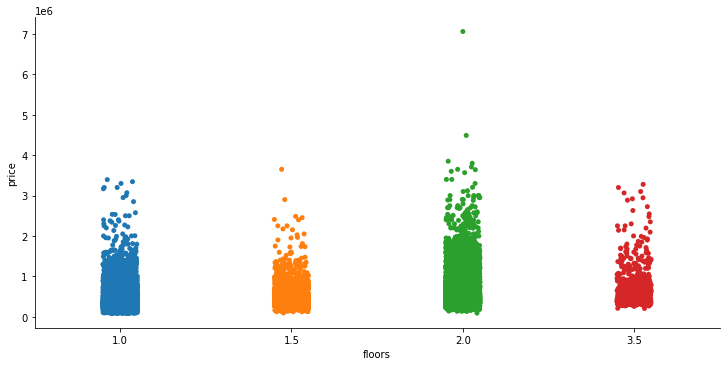

In [76]:
sns.catplot(x='floors', y='price', data=df, height=5, aspect=2) 

0    21371
1      158
Name: waterfront, dtype: int64


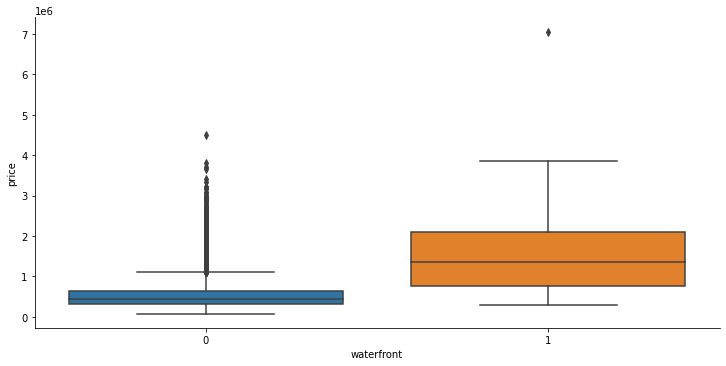

In [78]:
print(df.waterfront.value_counts())
sns.catplot(x='waterfront', y='price', data=df,
            kind='box', height=5, aspect=2)

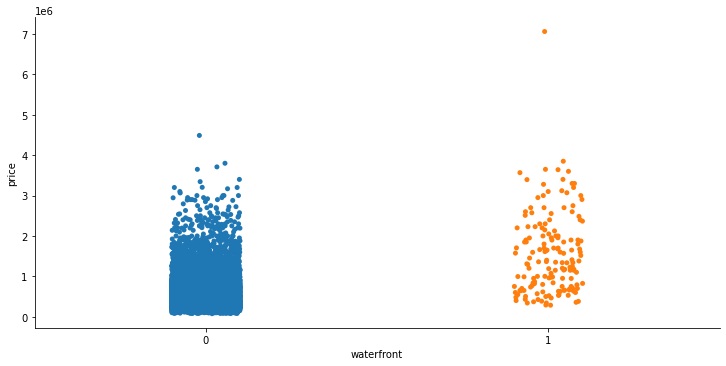

In [79]:
sns.catplot(x='waterfront', y='price', data=df, height=5, aspect=2) 

## Viz for year built and year renovated

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

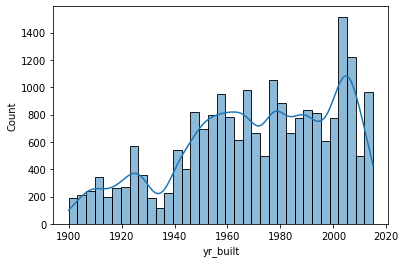

In [80]:
sns.histplot(df.yr_built, kde=True)

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

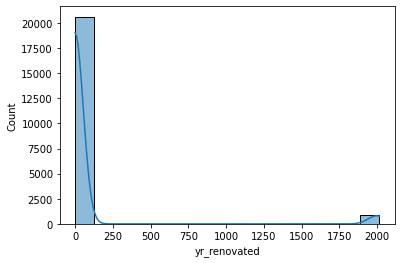

In [81]:
sns.histplot(df['yr_renovated'], kde=True)

In [82]:
df.yr_renovated = df.yr_renovated.apply(lambda x: 0 if x==0 else 1)

## Now the data already seems almost ready to use, but we need to integrate the zip code so we can show the actual location (City) where the house is placed

In [98]:
city=pd.read_csv('C:/Users/HP/Documents/RuangGuru/Python_training/House Price/zip_clue.csv',sep=';')

In [117]:
df_merge=pd.merge(city,df,on='zipcode',how='right')

In [120]:
df_merge.head()

,zipcode,city,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98178,Seattle,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,98125,Seattle,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,47.7210,-122.319,1690,7639
2,98028,Kenmore,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,98136,Seattle,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,98074,Sammamish,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [119]:
df_merge.rename(columns = {'Official USPS city name':'city'}, inplace = True)

In [124]:
df_merge.city.value_counts().head(10)

Seattle        8953
Renton         1592
Bellevue       1388
Kent           1201
Redmond         977
Kirkland        973
Auburn          910
Sammamish       794
Federal Way     778
Issaquah        732
Name: city, dtype: int64

In [126]:
df_merge.drop('zipcode', axis=1, inplace=True)

## Preprocessing phase for modelling

In [127]:
X = df_merge.drop('price', axis=1)
y = df_merge.price.astype(int)

In [128]:
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [129]:
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [130]:
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [131]:
# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

## Creating function to implement the model and evaluate it

In [134]:
# create a pipeline
def pipeline_model(X, y, data):
    pipe = make_pipeline(preprocessor, LinearRegression())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=32)

    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          f'\n'
          f'Score (train)   : {pipe.score(X_train, y_train)}\n'
          f'Score (test)    : {pipe.score(X_test, y_test)}\n')
    comparison_of_results(X_test, y_test, pipe)
    visualize_model_results(data, pipe)

def comparison_of_results(X_test, y_test, model, times=5):
    for i in range(times):
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        real = y_test.iloc[rnd]
        pred = int(model.predict(X_test.iloc[rnd].to_frame().T)[0])
        print(f'Real Value      ----->>>>> {real} $\n'
              f'Predicted Value ----->>>>> {pred} $')
        print()


def visualize_model_results(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data.drop('price', axis=1)
    y = data.price.astype(int)
    
    plt.scatter(range(X.shape[0]), y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), model.predict(X), marker='.', label='Predict')

    plt.legend(loc=2, prop={'size': 25})


0.7464340341095145
MSE             : 28639893662.46248

RMSE            : 169233.2522362626
MAE             : 110888.51340879731

Score (train)   : 0.7503683602807429
Score (test)    : 0.7514443623737783

Real Value      ----->>>>> 1650000 $
Predicted Value ----->>>>> 1093487 $

Real Value      ----->>>>> 290000 $
Predicted Value ----->>>>> 218369 $

Real Value      ----->>>>> 200000 $
Predicted Value ----->>>>> 217595 $

Real Value      ----->>>>> 525000 $
Predicted Value ----->>>>> 555818 $

Real Value      ----->>>>> 380000 $
Predicted Value ----->>>>> 295667 $



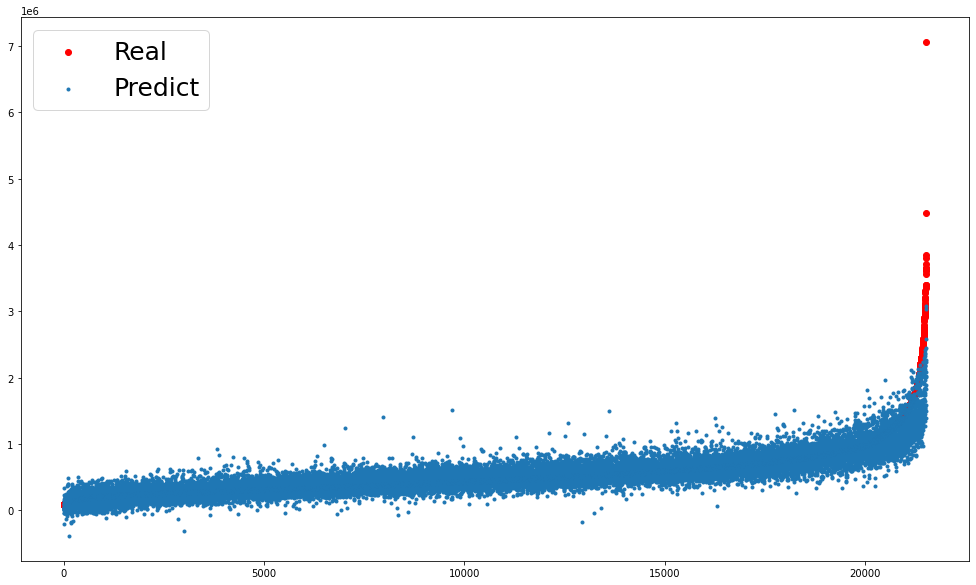

In [135]:
pipeline_model(X, y, df_merge)

### Total Accuracy we get from this model is 75%. Not bad, isnt it? :)